In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [7]:
df = data.copy()

In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df['class_num'] = df['class'].map({'First':1,'Second':2,'Third':3})

In [10]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\mufen\AppData\Local\Temp\ipykernel_9712\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [11]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

C:\Users\mufen\AppData\Local\Temp\ipykernel_9712\1024298632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [12]:
df.drop('deck',axis=1,inplace=True)

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,3


In [14]:
df['alive_num'] = df['alive'].map({'no':0,'yes':1})

<Axes: xlabel='survived', ylabel='count'>

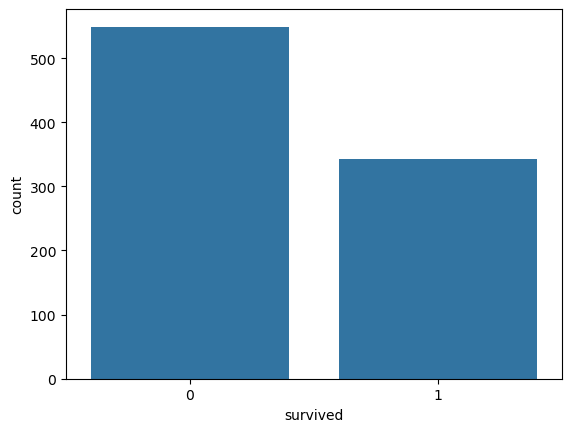

In [15]:
survived_count = df['survived'].value_counts()
sns.countplot(data=df,x='survived')

In [16]:
pd.crosstab(df['class'],df['sex'],normalize='columns').round(2)*100

sex,female,male
class,,
First,30.0,21.0
Second,24.0,19.0
Third,46.0,60.0


Text(0, 0.5, 'Num of class')

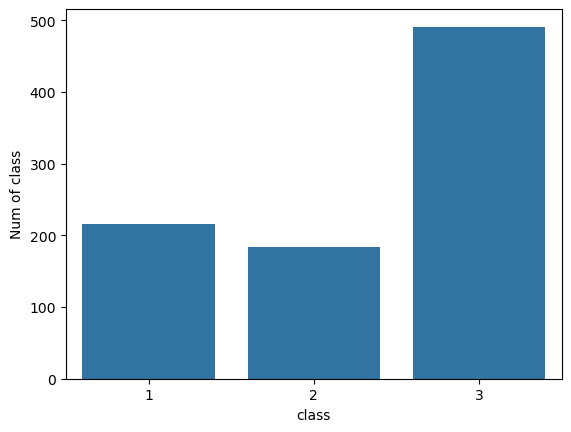

In [17]:
sns.countplot(data=df,x='class_num')
#plt.rcParams['font.family'] = ['PingFang SC']
plt.xlabel('class')
plt.ylabel('Num of class')

<Axes: xlabel='adult_male'>

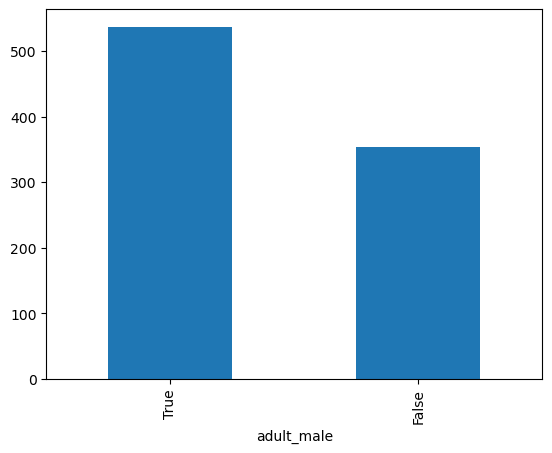

In [18]:
df['adult_male'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='Density'>

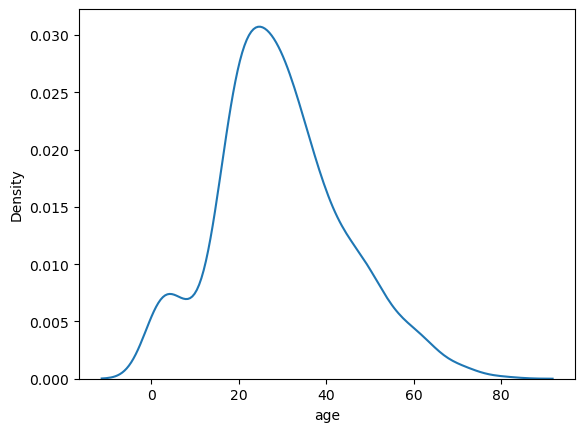

In [19]:
sns.kdeplot(data['age'])

In [20]:
print(f"{data['age'].skew():.2f}")

0.39


In [21]:
df['rmb'] = df['fare'].apply(lambda x: x*7.13 if isinstance(x,float) else x)
print(f"{df['rmb'].skew():.2f}")

4.79


<Axes: xlabel='rmb', ylabel='Count'>

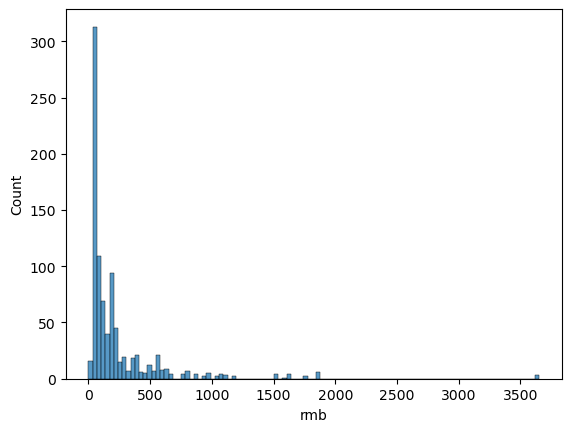

In [22]:
sns.histplot(df['rmb'])

In [23]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

Text(0, 0.5, 'prefer nums')

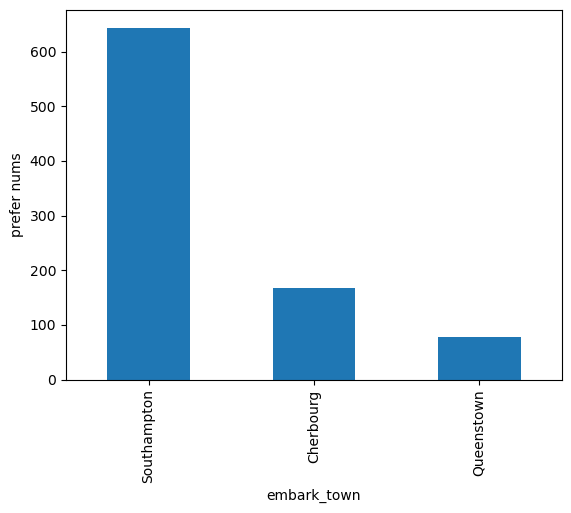

In [24]:
df['embark_town'].value_counts().plot(kind='bar')
plt.ylabel('prefer nums')

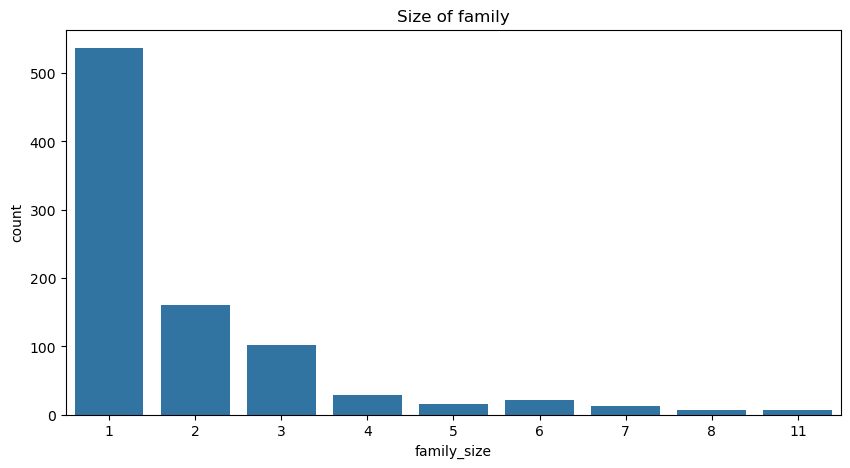

In [25]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='family_size')
plt.title('Size of family')
plt.show()

<Axes: xlabel='alone', ylabel='count'>

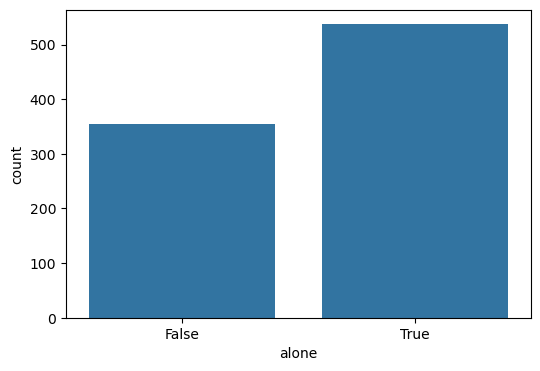

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='alone')

Text(0.5, 1.0, 'survived by sex')

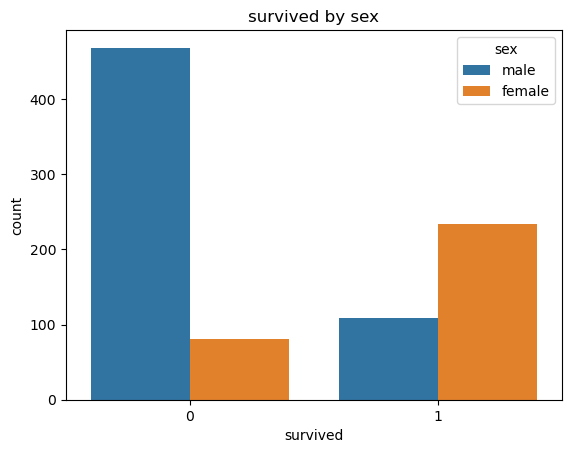

In [27]:
sns.countplot(data=df,x='survived',hue='sex')
plt.title('survived by sex')

Text(0.5, 1.0, 'pclass by survived')

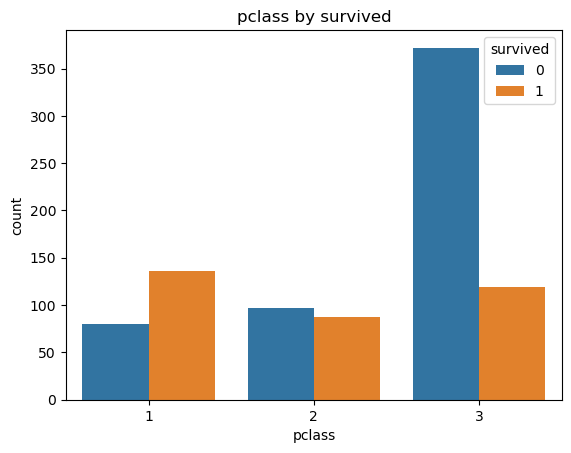

In [28]:
sns.countplot(data=df,x='pclass',hue='survived')
plt.title('pclass by survived')

Text(0.5, 1.0, 'survived plot by embarked')

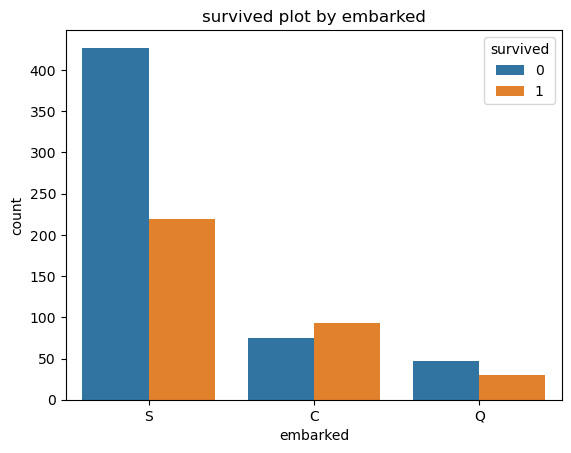

In [29]:
sns.countplot(data=df,x='embarked',hue='survived')
plt.title("survived plot by embarked")

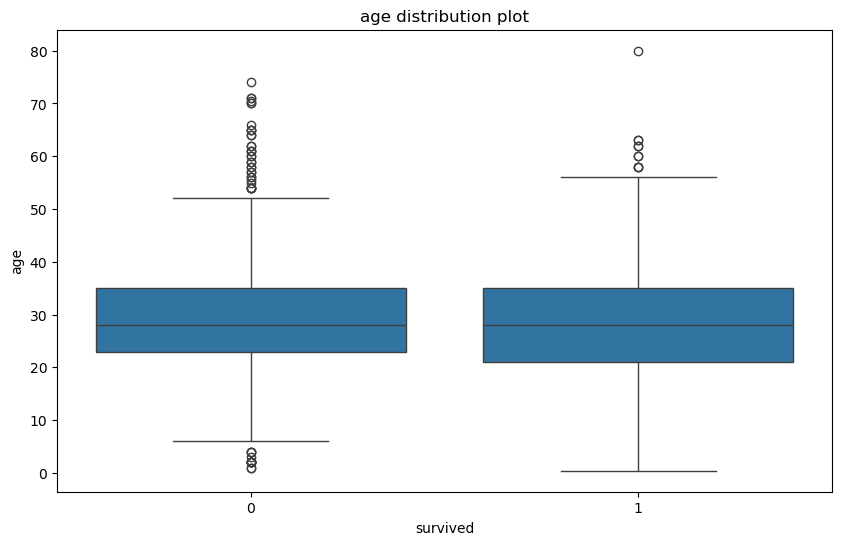

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='age',x='survived')
plt.title("age distribution plot")
plt.show()

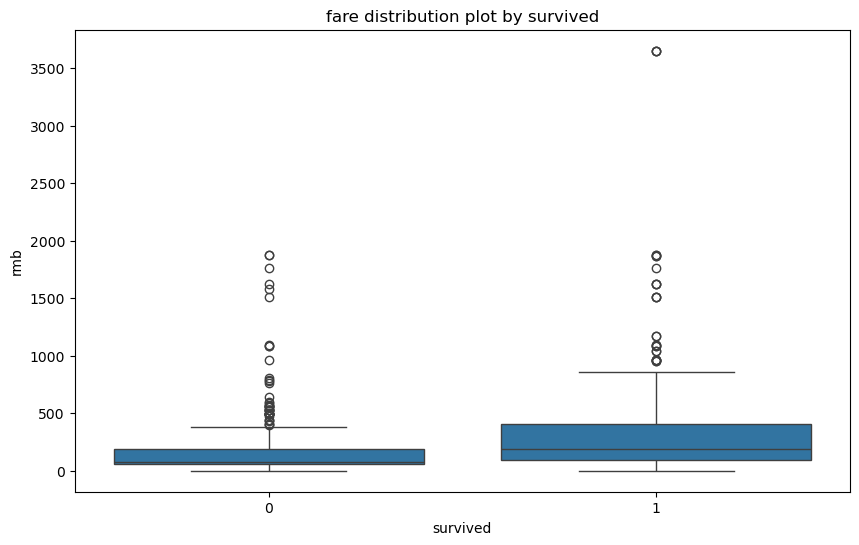

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='rmb',x='survived')
plt.title("fare distribution plot by survived")
plt.show()

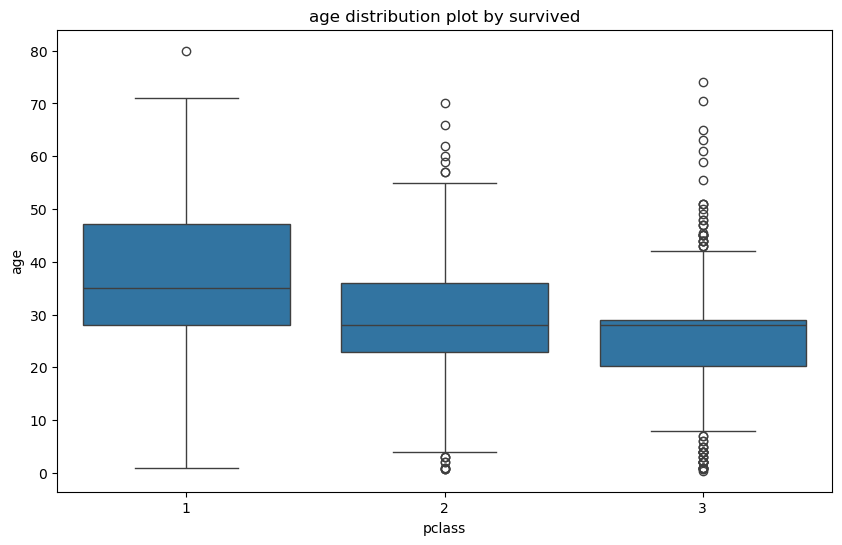

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='age',x='pclass')
plt.title("age distribution plot by survived")
plt.show()

Text(0.5, 1.0, 'survived people by gender and class')

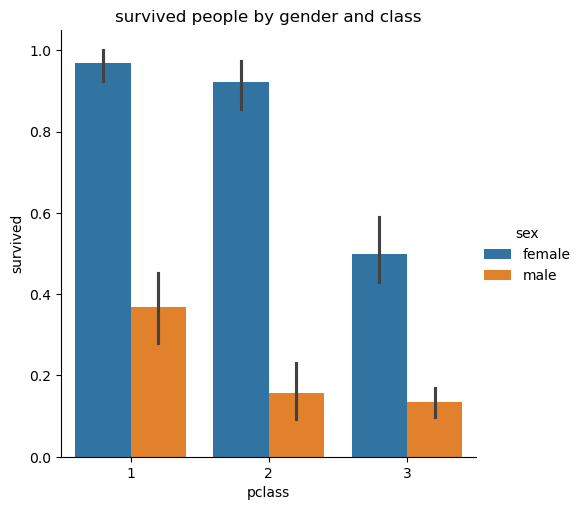

In [33]:
sns.catplot(data=df,kind='bar',x='pclass',y='survived',hue='sex')
plt.title("survived people by gender and class")

<Axes: xlabel='pclass', ylabel='age'>

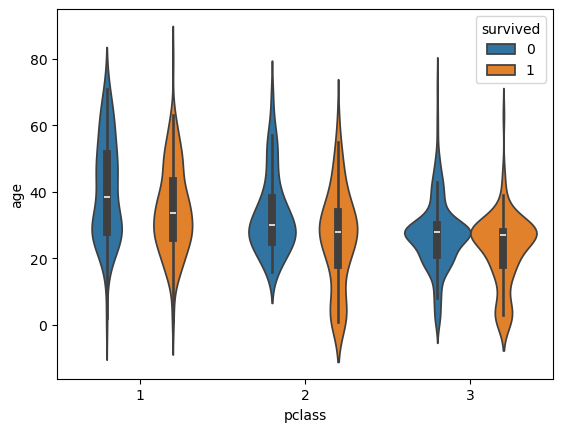

In [34]:
sns.violinplot(data=df,x='pclass',y='age',hue='survived')

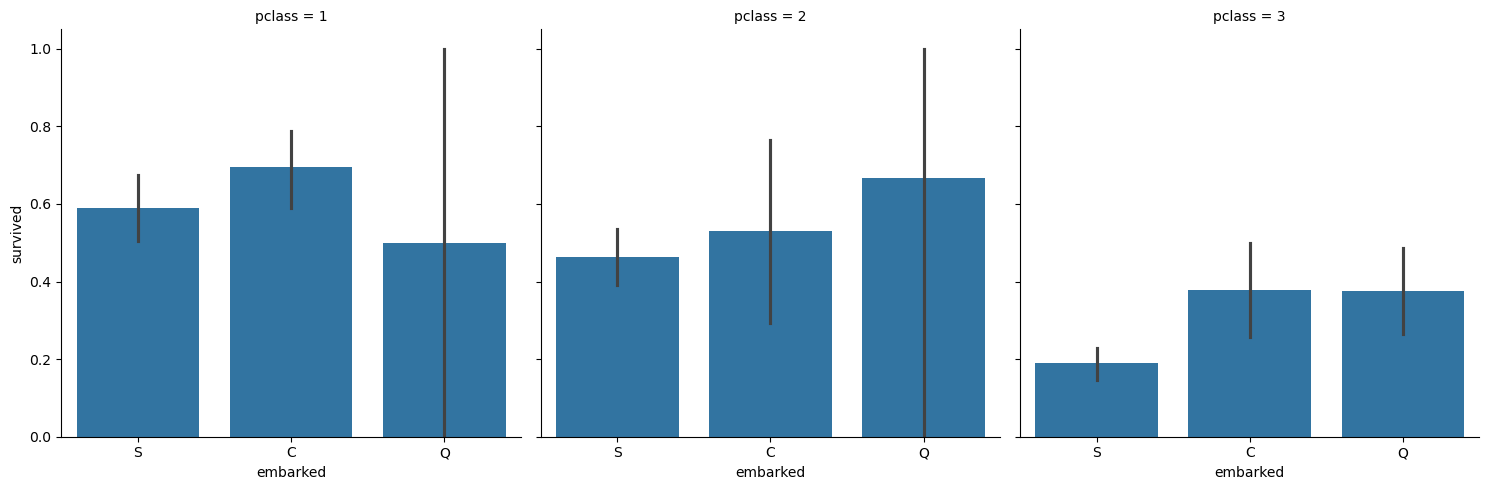

In [35]:
sns.catplot(data=df,kind='bar',x='embarked',y='survived',col='pclass')

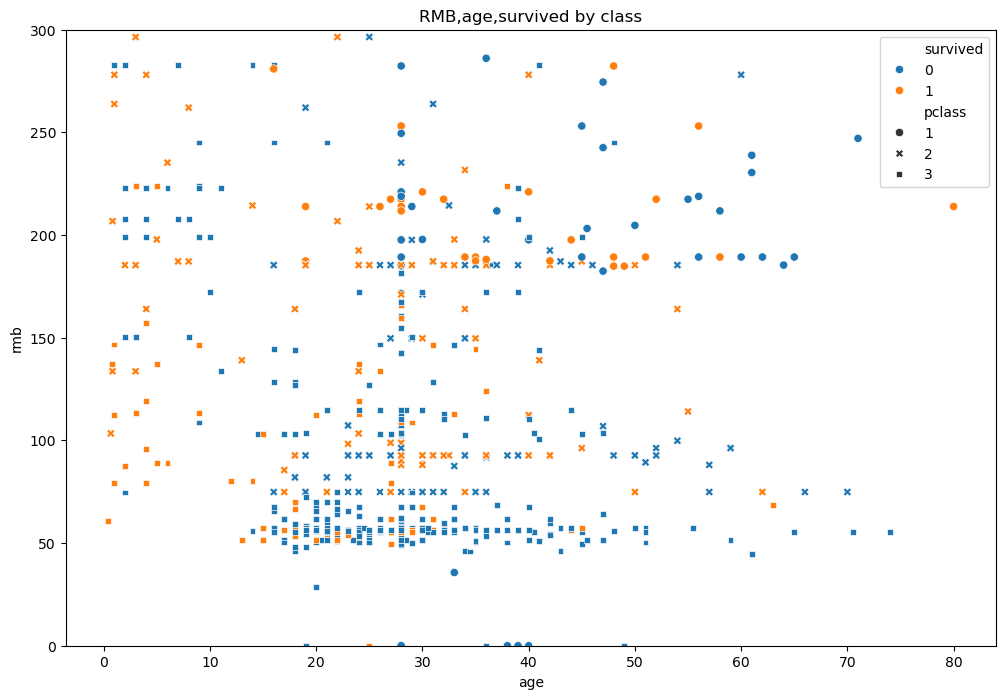

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='age',y='rmb',hue='survived',style='pclass')
plt.ylim(0,300)
plt.title("RMB,age,survived by class")
plt.show()

In [37]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  class_num    891 non-null    category
 15  alive_num    891 non-null    int64   
 16  rmb          891 non-null    float64 
 17  family_size  891 non-null    int64   
dtypes: bool(2), category(2), float

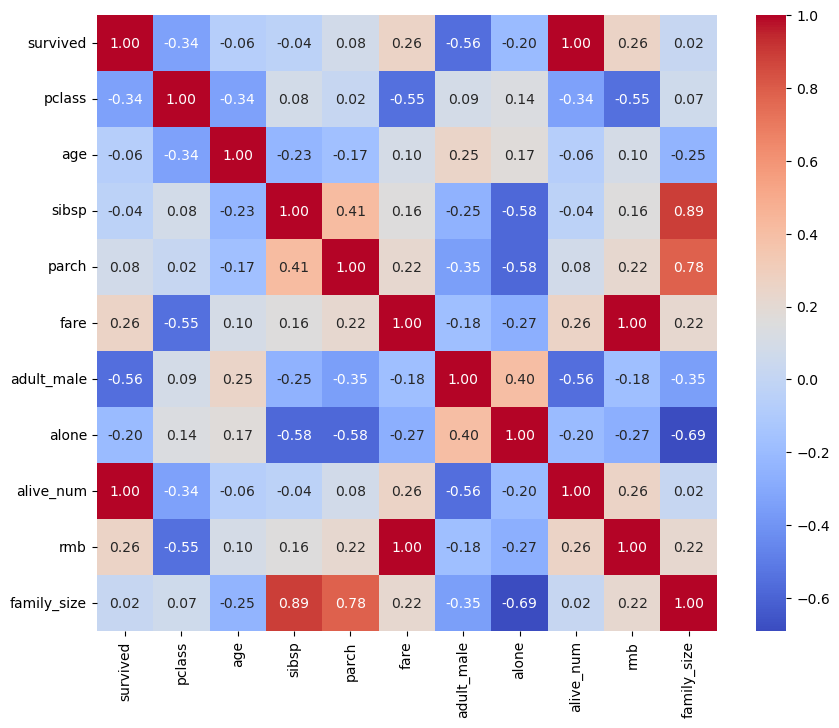

In [38]:
numerica_col = df.select_dtypes(include=['float64','int64','bool'])
plt.figure(figsize=(10,8))
sns.heatmap(numerica_col.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

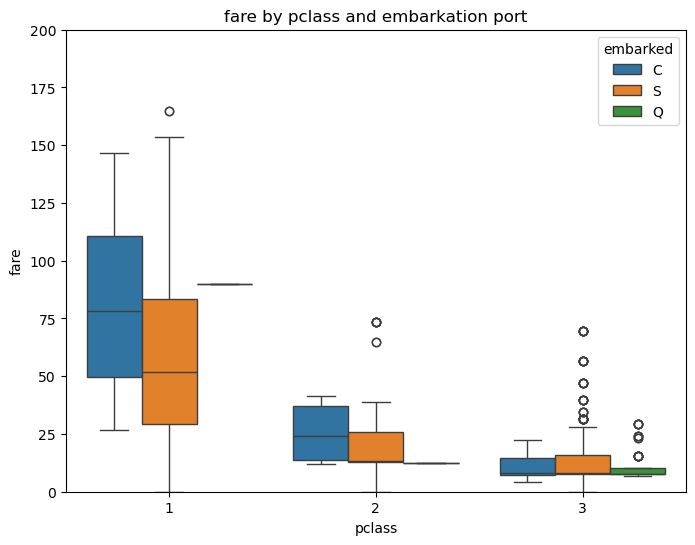

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='pclass',y='fare',hue='embarked')
plt.ylim(0,200)
plt.title("fare by pclass and embarkation port")
plt.show()

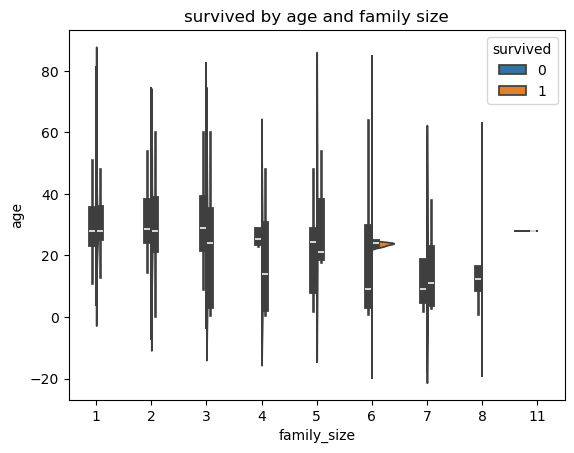

In [40]:
sns.violinplot(data=df,x='family_size',y='age',hue='survived',split=True)
plt.title("survived by age and family size")
plt.show()

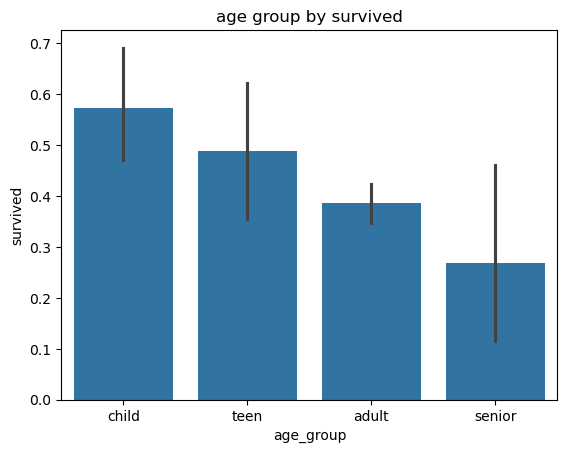

In [41]:
bins = [0,12,18,60,100]
labels = ['child','teen','adult','senior']
data['age_group'] = pd.cut(data['age'],bins=bins,labels=labels,right=False)
sns.barplot(data=data,x='age_group',y='survived')
plt.title("age group by survived")
plt.show()

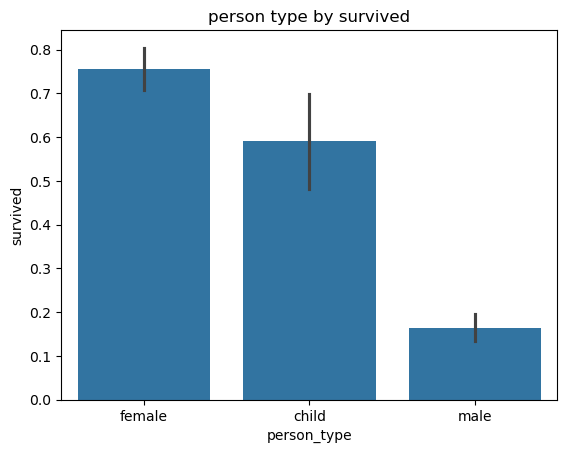

In [42]:
data['person_type'] = data.apply(lambda row:'child' if row['age']<16 else row['sex'],axis=1)
sns.barplot(data=data,x='person_type',y='survived',order=['female','child','male'])
plt.title("person type by survived")
plt.show()

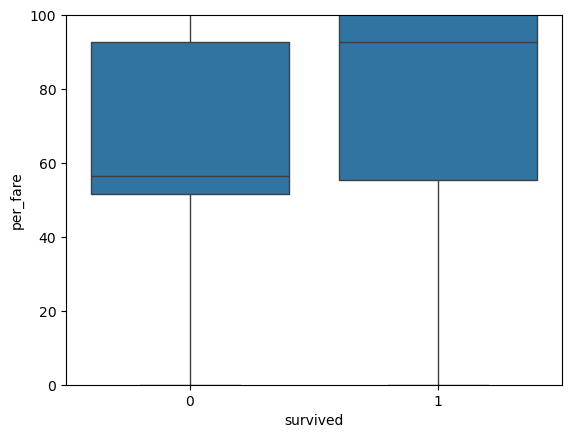

In [43]:
df['per_fare'] = df['rmb'] / df['family_size']
sns.boxplot(data=df,x='survived',y='per_fare')
plt.ylim(0,100)
plt.show()

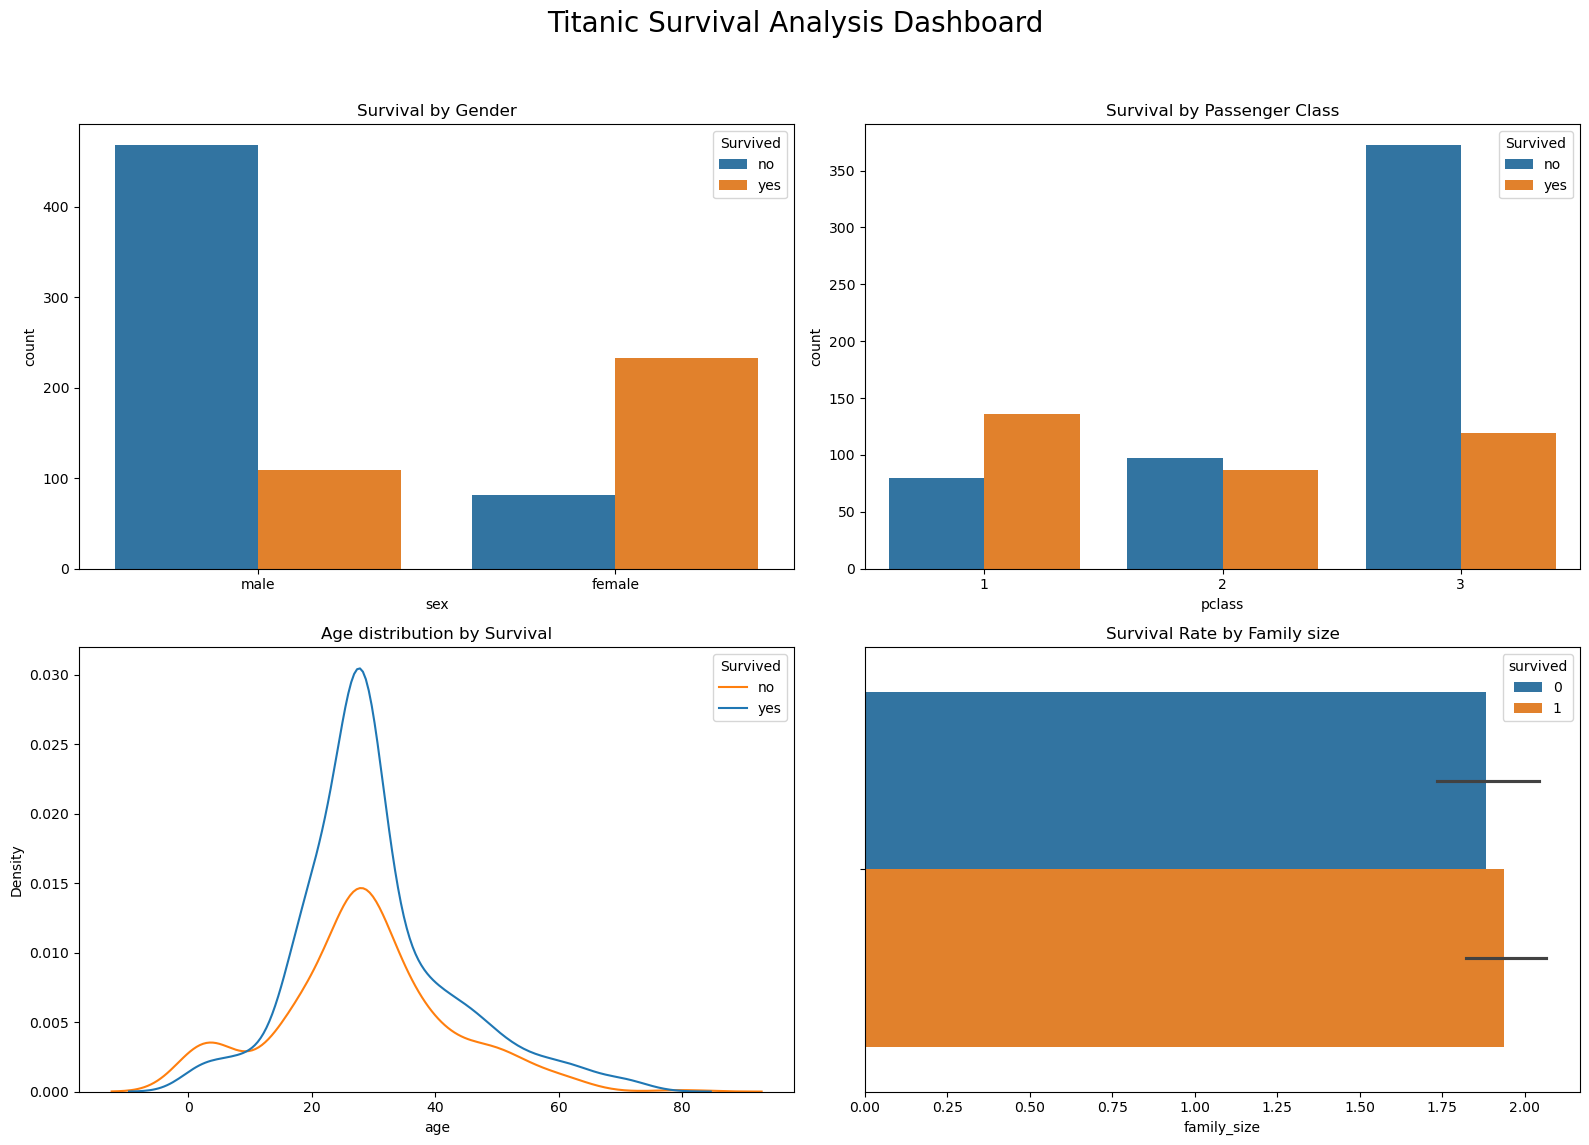

In [46]:
fig,axes = plt.subplots(2,2,figsize=(16,12))

fig.suptitle("Titanic Survival Analysis Dashboard",fontsize=20)
sns.countplot(ax=axes[0,0],data=df,x='sex',hue='survived')
axes[0,0].set_title("Survival by Gender")
axes[0,0].legend(title='Survived',labels=['no','yes'])

sns.countplot(ax=axes[0,1],data=df,x='pclass',hue='survived')
axes[0,1].set_title("Survival by Passenger Class")
axes[0,1].legend(title='Survived',labels=['no','yes'])

sns.kdeplot(ax=axes[1,0],data=df,x='age',hue='survived')
axes[1,0].set_title("Age distribution by Survival")
axes[1,0].legend(title='Survived',labels=['no','yes'])

sns.barplot(data=df,ax=axes[1,1],x='family_size',hue='survived')
axes[1,1].set_title("Survival Rate by Family size")
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()